In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [2]:
iris = load_iris()
print(iris.keys())
print('feature_names: ',iris.feature_names)
print('target_names: ' ,iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names:  ['setosa' 'versicolor' 'virginica']


In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


## KNeighborsClassifier
    weights : {'uniform', 'distance'}
    p : default=2
    n_neighborsint (k): default=5

In [4]:
knn_clf = KNeighborsClassifier(n_neighbors=10, p=2, weights='uniform')
knn_clf.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [5]:
ypred_test = knn_clf.predict(xtest)
accuracy_score(ytest, ypred_test)

0.9473684210526315

## accuracy vs k

In [6]:
k = [i for i in range(1,101)]
accuracy_scores_k = []
for ki in k:
    knn_clf_k = KNeighborsClassifier(n_neighbors=ki)
    knn_clf_k.fit(xtrain, ytrain)
    y_pred_k = knn_clf_k.predict(xtest)
    accuracy_scores_k.append(accuracy_score(y_pred_k, ytest))

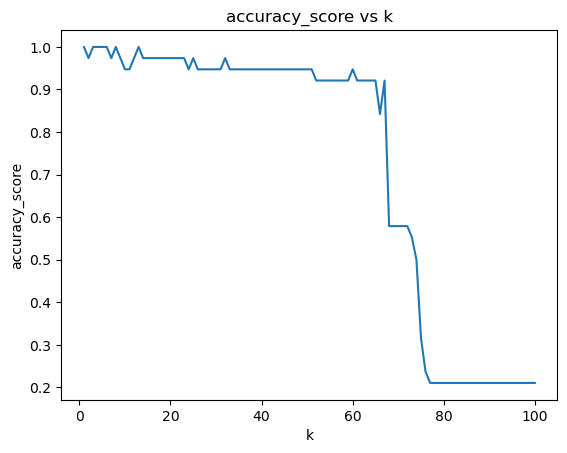

In [7]:
plt.plot(k, accuracy_scores_k)
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.title('accuracy_score vs k')
plt.show()

## accuracy vs p

In [8]:
p = [i for i in range(1,11)]
accuracy_scores_p = []
for pi in p:
    knn_clf_p = KNeighborsClassifier(n_neighbors=10, p=pi)
    knn_clf_p.fit(xtrain, ytrain)
    y_pred_p = knn_clf_p.predict(xtest)
    accuracy_scores_p.append(accuracy_score(y_pred_p, ytest))

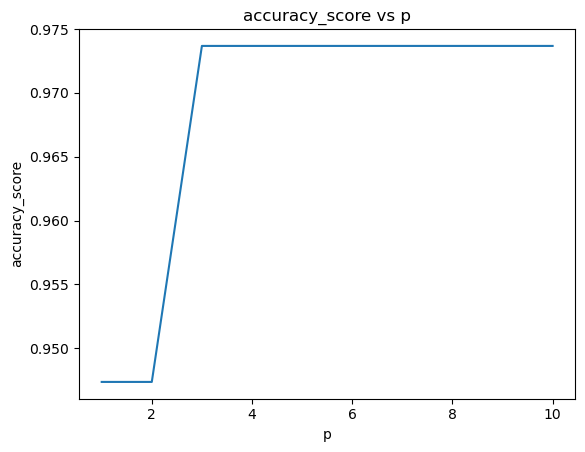

In [9]:
plt.plot(p, accuracy_scores_p)
plt.xlabel('p')
plt.ylabel('accuracy_score')
plt.title('accuracy_score vs p')
plt.show()

## accuracy vs weights

In [10]:
weights = ['uniform', 'distance']
accuracy_scores_w = []
for wi in weights:
    knn_clf_w = KNeighborsClassifier(n_neighbors=10, p=4, weights=wi)
    knn_clf_w.fit(xtrain, ytrain)
    y_pred_w = knn_clf_w.predict(xtest)
    accuracy_scores_w.append(accuracy_score(y_pred_w, ytest))

[Text(0, 0, '0.973684'), Text(0, 0, '1')]

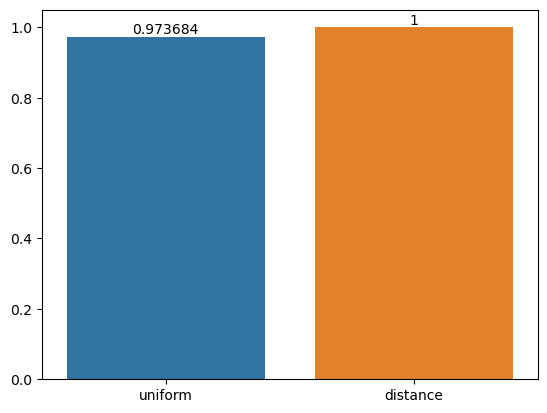

In [11]:
ax = sns.barplot(x=weights, y=accuracy_scores_w)
ax.bar_label(ax.containers[0])